## 라이브러리 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
train_df = pd.read_csv('/home/lee/sources/dataset/titanic/train.csv')
test_df = pd.read_csv('/home/lee/sources/dataset/titanic/test.csv')

## EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### 891명의 탑승자의 대한 정보가 있지만 Train set은 Age,Cabin,Embarked에 결측치가 있기 때문에 처리가 필요
##### Test set은 Age와 Fare,Cabin의 대한 결측 처리가 필요

##### 'PassengerId'  = 탑승자 데이터 일련번호
##### 'Survived'     = 생존 여부 ,0 = 죽음 ,1 = 생존
##### 'Pclass'       = 티켓의 선실 등급 1,2,3 순서대로 일,이,삼등석
##### 'Name'         = 탑승자의 이름
##### 'Sex'          = 탑승자의 성별
##### 'Age'          = 탑승자의 나이
##### 'SibSp'        = 같이 탑승한 형제자매 또는 배우자 인원수
##### 'Parch'        = 같이 탑승한 부모 또는 자녀 인원수
##### 'Ticket'       = 티켓번호
##### 'Fare'         = 요금
##### 'Cabin'        = 선실 번호
##### 'Embarked      = 중간 정착항구 C = Cherbourg Q = Queenstown S = Southampton

### 결측치 처리

In [5]:
train_df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### Cabin 컬럼이 결측이 가장 많지만 타겟인 생존 컬럼에 영향을 미치는 지 확인

In [6]:
len(train_df['Cabin'].unique())

148

In [7]:
train_df['Cabin'].unique()[:20]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

In [8]:
train_df['Cabin'] = train_df['Cabin'].str[0]
train_df['Cabin'] = train_df['Cabin'].fillna('M')

In [9]:
train_df['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot: xlabel='Cabin', ylabel='Survived'>

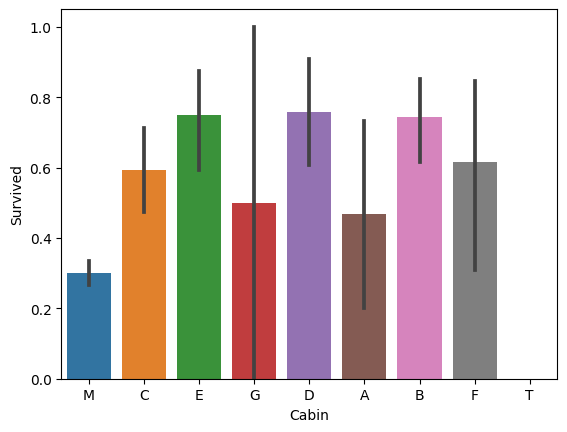

In [10]:
sns.barplot(x='Cabin',y='Survived',data=train_df)

### 결측의 처리를 위해 채운 'M'이였지만 M 선실번호 즉 결측이였던 탑승자들은 생존율이 가장 낮은 편이므로 
### M의 선실을 사용한 탑승객은 생존율이 낮다고 볼 수 있다.

In [11]:
# test set Cabin의 결측도 'M'으로 대체
test_df['Cabin'] = test_df['Cabin'].str[0]
test_df['Cabin'] = test_df['Cabin'].fillna('M')

In [12]:
test_df['Cabin'].isna().sum()

0

In [13]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

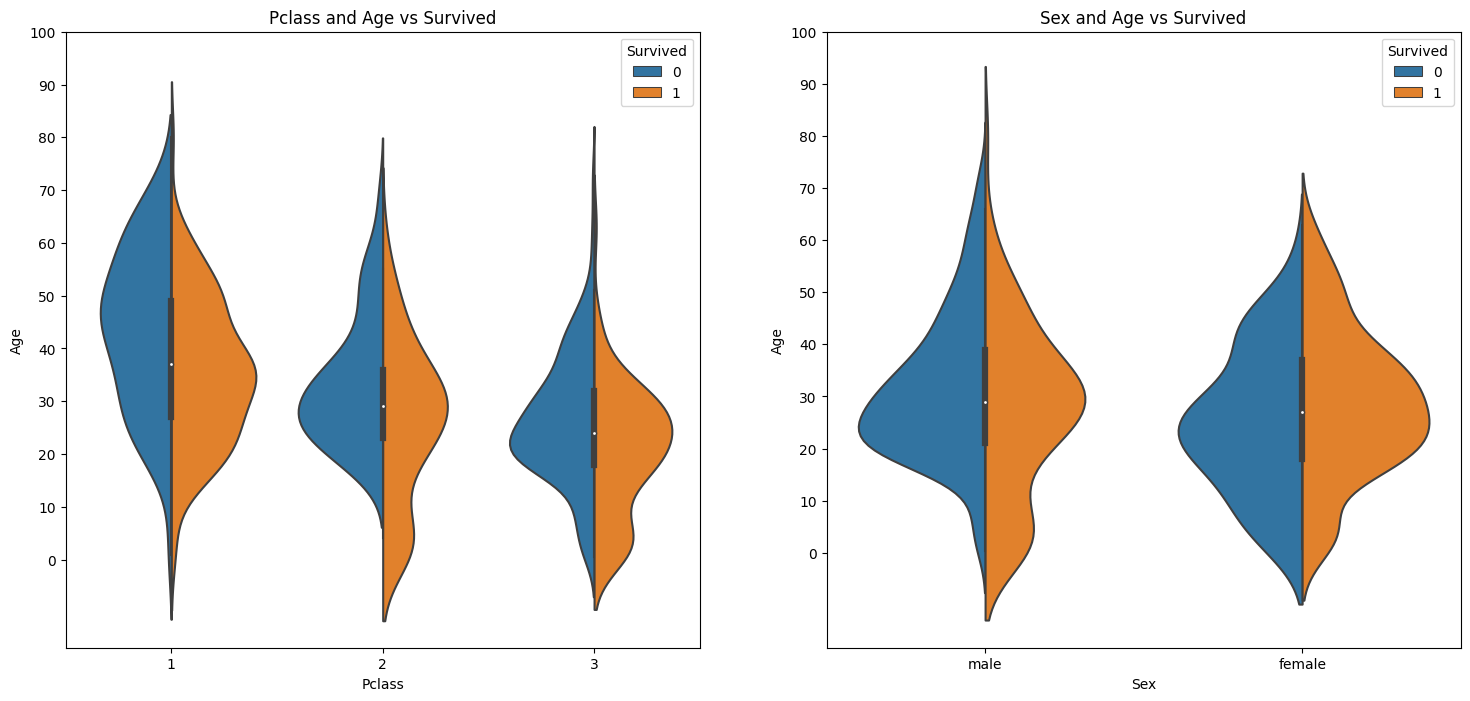

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x= 'Pclass', y='Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

##### 20~50대의 연령의 경우 사망자가 많고 0~10대의 경우 생존자가 많았으며 남자이면서 20~30대일 경우 사망자가 매우 많고
##### 여자일 경우 20~40대일 경우 생존자가 많다.이름 또는 기타 컬럼을 이용하여 Age의 결측을 처리
##### 나이를 연령대로 나누어 범주화 후 타겟 컬럼과 비교
##### 20 대이하,20~29,30~39,40~49,50~대 이상으로 범주화

In [15]:
train_df['Initial'] = 0
test_df['Initial'] = 0
combine_dataset = [train_df,test_df]
for data in combine_dataset:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # Name 컬럼에서 문자열을 추출하는데 조건은 영문이면서'.' 와 붙어있을 것
print(train_df['Initial'])
print(train_df['Name'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [16]:
train_df['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [17]:
train_df[['Initial', 'Age']].groupby(['Initial'], as_index=False).mean()

,Initial,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


In [18]:
pd.crosstab(train_df.Initial,train_df.Sex,margins=True)

Sex,female,male,All
Initial,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


In [19]:
Initial_list = ['Mr','Miss','Mrs','Master','Dr','Rev','Other']
for data in combine_dataset:
    data['Initial'].replace(
        ['Mlle','Mme' , 'Ms' ,'Major','Lady','Countess','Jonkheer','Col'  ,'Capt','Sir','Don'],
        ['Miss','Miss','Miss','Mr'   ,'Mrs' ,'Mrs'     ,'Other'   ,'Other','Mr'  ,'Mr' ,'Mr'],inplace=True)


In [21]:
train_df[["Initial", "Age"]].groupby(['Initial'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Initial,Age
5,Other,51.333333
6,Rev,43.166667
0,Dr,42.000000
4,Mrs,35.981818
3,Mr,32.601737
2,Miss,21.860000
1,Master,4.574167


In [28]:

for data in combine_dataset:
    data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=51
    data.loc[(data.Age.isnull())&(data.Initial=='Rev'),'Age']=43
    data.loc[(data.Age.isnull())&(data.Initial=='Dr'),'Age']=42
    data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
    data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
    data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
    data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
    
    data['Initial'] = data['Initial'].map( {'Other': 0, 'Rev': 1, 'Dr': 2, 'Mrs': 3, 'Mr': 4, 'Master': 5} ).astype(int)
    

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr', 'Other'], dtype=object)

#### Master는 Mr로 불리기 어려운 남성을 의미한다.5개 이하의 빈도를 가진 Mlle,Major,Col,Countess,Capt,Ms,Sir,Lady,Mme,Don,Jonkheer 들은
#### Other로 값을 대체한다.Mlle와 Mme 는 Miss의, Ms는 Mrs의 불어식 표현 Rev는 Reverend로 성직자란 뜻
#### Age 결측치까지 처리 후 연령대별 범주화 실시

In [23]:

for dataset in combine_dataset:
    dataset.loc[ dataset['Age'] < 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 29), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 39), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 49), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 49, 'Age'] = 4

In [24]:
train_df['Age'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Age, dtype: float64

In [25]:
test_df['Age'].head()

0    2.0
1    3.0
2    4.0
3    1.0
4    1.0
Name: Age, dtype: float64